## Setup

In [ ]:
# Getting the GitHub repository
! git clone https://github.com/doguilmak/Toxic-Tweet-Analysis

Cloning into 'Toxic-Tweet-Analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
# Importing Libraries
import re # regular expression matching operations (Unicode strings & 8-bit strings)
import string 
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Read Data

In [ ]:
# Reading the CSV file
# The CSV file contines Toxic & None Toxic tweets
df=pd.read_csv('/content/Toxic-Tweet-Analysis/FinalBalancedDataset.csv')
LABEL=df['Toxicity']
df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [ ]:
LABEL.value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

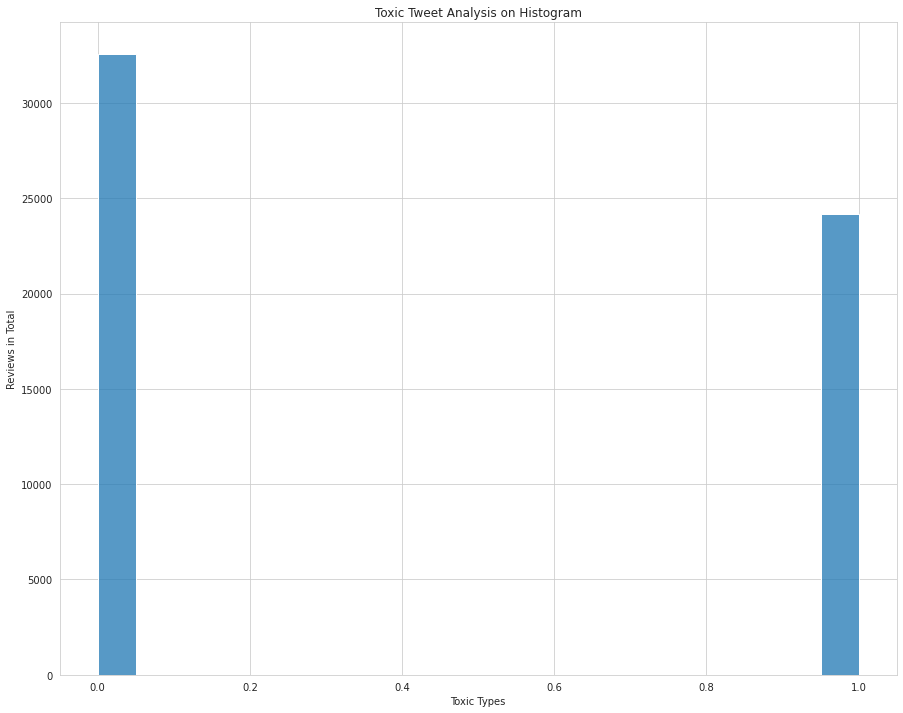

In [ ]:
plt.figure(figsize = (15, 12))
sns.set_style('whitegrid')    
sns.histplot(data=LABEL)
plt.title("Toxic Tweet Analysis on Histogram")
plt.xlabel("Toxic Types")
plt.ylabel("Reviews in Total")
plt.show()

In [ ]:
labels=df.Toxicity
labels.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Toxicity, dtype: int64

## Data Preprossing

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F" #emoticons
                u"\U0001F300-\U0001F5FF" #symbols & pictograms
                u"\U0001F680-\U0001F6FF" #transport & map symbols
                u"\U0001F1E0-\U0001F1FF" #flags(ios)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251" 
                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_text(text):
    delete_dict = {sp_character: '' for sp_character in string.punctuation}
    delete_dict[' '] = ' '
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr = text1.split()
    text2 = ' '.join([w for w in textArr if(not w.isdigit() and (not w.isdigit() and len(w) > 3))])

    return text2.lower()

In [ ]:
df['tweet'] = df['tweet'].apply(remove_emoji)
df['tweet'] = df['tweet'].apply(clean_text)


In [ ]:
df

,Unnamed: 0,Toxicity,tweet
0,0,0,user when father dysfunctional selfish drags k...
1,1,0,user user thanks lyft credit cant cause they d...
2,2,0,bihday your majesty
3,3,0,model love take with time urð± ðððð...
4,4,0,factsguide society motivation
...,...,...,...
56740,56740,1,yous muthafin 8220lifeasking 20pearls coreyema...
56741,56741,1,youve gone broke wrong heart baby drove rednec...
56742,56742,1,young buck wanna nigguh like aint fuckin again
56743,56743,1,youu wild bitches tellin lies


## Training

In [ ]:
# Split the data 
x_train, x_test, y_train, y_test=train_test_split(df['tweet'], labels, test_size=0.2, random_state=0)

In [ ]:
# TF_IDF 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) # Try to change the stop_words list for something better
print (tfidf_vectorizer)

TfidfVectorizer(max_df=0.7, stop_words='english')


In [ ]:
tfidf_train = tfidf_vectorizer.fit_transform(x_train) # Fit to data, then transform it.
tfidf_test = tfidf_vectorizer.transform(x_test) # Transform a count matrix to a normalized tf or tf-idf representation.


In [ ]:
pac = PassiveAggressiveClassifier(max_iter=100, random_state=0,tol=1e-3)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=100, random_state=0)

In [ ]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy score: {score}')

Accuracy score: 0.9014891179839634


In [ ]:
cm=confusion_matrix(y_test, y_pred, labels=[0, 1])
print("\nConfusion Matrix (PassiveAggressiveClassifier):\n", cm)


Confusion Matrix (PassiveAggressiveClassifier):
 [[5993  478]
 [ 640 4238]]


## Testing 

In [ ]:
class_map = {0: "Not Toxic", 
            1: "Toxic"}

In [ ]:
# pred = ["@LlishaH LOL! It's an acronym for: that hoe over there."]
pred = ["@LlishaH dump guy"]
my_pred = tfidf_vectorizer.transform(pred)

my_predClass = pac.predict(my_pred)
print(f"Model predicted your sentiment as {class_map[int(my_predClass[0])]}.")

Model predicted your sentiment as Toxic.


## Saving Model

In [ ]:
import pickle

pickle_file = open('pac.pkl', 'ab')
pickle.dump(pac, pickle_file)                     
pickle_file.close()